In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [89]:
train.shape , test.shape

((891, 12), (418, 11))

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.Removing missing values

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [93]:
train.drop(columns=['Cabin'],inplace=True)

In [94]:
test.drop(columns=['Cabin'],inplace=True)

In [95]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [96]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [97]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [98]:
train['Embarked'].fillna('S',inplace=True)

In [99]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [100]:
np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

array([43, 36, 41, 41, 42, 29, 29, 42, 32, 36, 18, 40, 29, 32, 32, 17, 37,
       38, 31, 41, 26, 32, 17, 30, 37, 25, 31, 26, 37, 18, 24, 30, 42, 42,
       43, 18, 25, 25, 25, 30, 38, 35, 33, 34, 32, 23, 16, 35, 34, 35, 25,
       38, 34, 39, 23, 33, 32, 16, 29, 16, 17, 24, 24, 42, 18, 23, 25, 17,
       20, 35, 42, 21, 42, 25, 29, 18, 30, 27, 41, 40, 22, 43, 31, 43, 31,
       43, 28, 21, 30, 28, 43, 22, 31, 38, 15, 18, 15, 30, 39, 30, 18, 17,
       16, 27, 40, 21, 36, 21, 25, 34, 34, 39, 40, 21, 15, 20, 37, 16, 15,
       39, 22, 30, 38, 38, 29, 15, 36, 31, 43, 15, 41, 15, 42, 29, 28, 29,
       29, 16, 16, 31, 30, 28, 32, 17, 21, 27, 37, 15, 37, 18, 23, 17, 22,
       16, 17, 26, 29, 22, 15, 41, 40, 22, 16, 32, 16, 15, 35, 31, 16, 18,
       27, 42, 34, 43, 23, 35, 27])

In [101]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [102]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [103]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_1420\1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [104]:
train['Age'].isnull().sum()

0

In [105]:
test['Age'][test['Age'].isnull()] = test_age
test['Age'].isnull().sum()

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_1420\1437484037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


0

In [106]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [107]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2.EDA 

In [108]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [109]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [110]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_1420\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

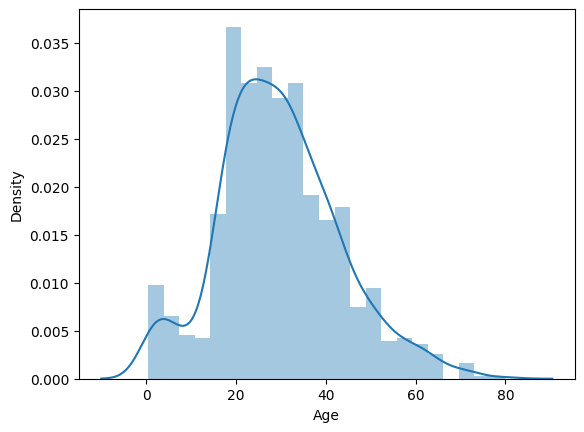

In [111]:
sns.distplot(train['Age'])

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_1420\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_1420\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==

<AxesSubplot: xlabel='Age', ylabel='Density'>

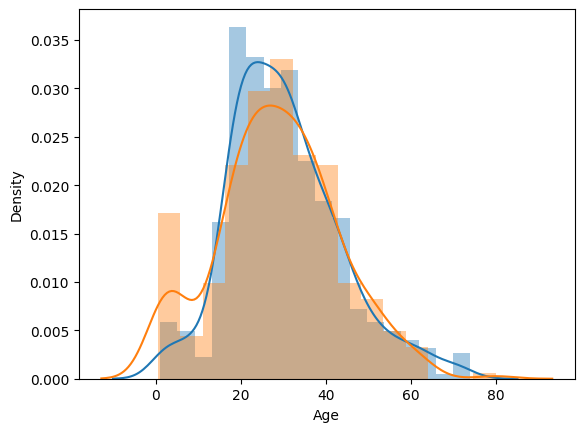

In [112]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

In [113]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [114]:
train['family'] = train['SibSp'] + train['Parch'] +1

In [115]:
test['family'] = test['SibSp'] + test['Parch'] +1

In [116]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [117]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [118]:
def calculate(num):
    if num ==1:
        return 'alone'
    elif num>1 and num<5:
        return 'medium'
    else :
        return 'large'

In [119]:
train['famiy_size']=train['family'].apply(calculate)

In [120]:
test['famiy_size']=test['family'].apply(calculate)

In [121]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,famiy_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,medium


In [122]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [123]:
PassengerId = test['PassengerId'].values

In [124]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [125]:
train.to_csv('updated_train_csv')
test.to_csv('updated_test_csv')

In [126]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','famiy_size'],drop_first=True)

In [127]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,famiy_size_large,famiy_size_medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [128]:
train.shape

(891, 10)

In [129]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','famiy_size'],drop_first=True)

In [130]:
test.shape

(418, 9)

## 3.Modeling

In [131]:
X = train.drop('Survived',axis=1).values
y = train['Survived'].values

In [132]:
X

array([[22.    ,  7.25  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [38.    , 71.2833,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    ,  7.925 ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       ...,
       [17.    , 23.45  ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [26.    , 30.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [150]:
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [166]:
dt = DecisionTreeClassifier(max_depth=10)

In [167]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [168]:
y_pred = dt.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
accuracy_score(y_pred ,y_test)

0.7932960893854749

In [181]:
et = ExtraTreeClassifier(max_depth=10)
et.fit(X_train,y_train)

y_pred = et.predict(X_test)
accuracy_score(y_pred , y_test)

0.7597765363128491

In [182]:
lor = LogisticRegression()
lor.fit(X_train,y_train)

y_pred = et.predict(X_test)
accuracy_score(y_pred , y_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7597765363128491

In [184]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

y_pred = et.predict(X_test)
accuracy_score(y_pred , y_test)

0.7597765363128491

In [192]:
rf = RandomForestClassifier(max_depth=10,n_estimators=1000)
rf.fit(X_train,y_train)

y_pred = et.predict(X_test)
accuracy_score(y_pred , y_test)

0.7597765363128491

In [193]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = et.predict(X_test)
accuracy_score(y_pred , y_test)

0.7597765363128491

## 4.Final prediction 

In [194]:
xf = test.iloc[:,:].values

In [195]:
y_final = dt.predict(xf)

In [196]:
final = pd.DataFrame()

In [197]:
final['PassengerId'] = PassengerId
final['Survived'] = y_final

In [198]:
final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0


In [199]:
PassengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [200]:
y_final.shape

(418,)

In [201]:
final.to_csv('submission.csv',index=False)